In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

### 1a) How many countries are present?

In [4]:
print("The number of countries is:", len(df["country"].unique()))

The number of countries is: 219


### 1b) What's the timespan of the data?


In [5]:
print("The data ranges from:", df["year"].min(), "to", df["year"].max(), "\nThe timespan of the data is:", df["year"].max() - df["year"].min(), "years")

The data ranges from: 1980 to 2013 
The timespan of the data is: 33 years


### 1c,d) Does each country have a row for every year present? Which countries are missing years?


In [6]:
df.groupby(['country'])["year"].count().loc[df.groupby(['country'])["year"].count()!=(df["year"].max() - df["year"].min()+1)]

country
Bonaire, Saint Eustatius and Saba     4
Curacao                               4
Montenegro                            9
Netherlands Antilles                 30
Serbia                                9
Serbia & Montenegro                  25
Sint Maarten (Dutch part)             4
South Sudan                           3
Timor-Leste                          12
Name: year, dtype: int64

#### From the above table, we can see that there are in fact countries which do not have data for all 34 years.

### 1e) How many rows have at least 1 non-null values across the columns 3-57?

In [7]:
df_smaller = df.drop(['country', 'year'], axis=1)
print("Number of rows with at least 1 non-null value is:",df_smaller.dropna(how = 'all').shape[0])

Number of rows with at least 1 non-null value is: 3484


### Question 2 Wide data isn't usually helpful

In [8]:
melted = pd.melt(df, id_vars = ["country", "year"], var_name = "Diagnosis full", value_name = "Case count")

In [9]:
melted.sample(20)

,country,year,Diagnosis full,Case count
138725,Cambodia,1985,new_sn_m5564,NaN
150407,Saudi Arabia,1998,new_sn_m65,NaN
255661,Ethiopia,1989,new_ep_f014,NaN
233024,Chad,1994,new_ep_m4554,NaN
57281,Turks and Caicos Islands,1987,new_sp_f014,NaN
295570,Spain,1980,new_ep_f5564,NaN
256287,Haiti,2003,new_ep_f014,NaN
331064,Republic of Moldova,1995,newrel_m3544,NaN
47123,Libya,1983,new_sp_m65,NaN
68958,Madagascar,1996,new_sp_f2534,1031.0


In [10]:
melted = melted.replace(regex = {r'new_sp':'Pulmonary Smear (+)', r'new_sn':'Pulmonary Smear (-)', r'new_ep':'Extrapulmonary', r'newrel':'Relapse'})

In [11]:
melted["Diagnosis"] = melted["Diagnosis full"].str.split("_").str[0]

In [12]:
melted["Gender"] = melted["Diagnosis full"].str.split("_").str[1].str[0]

In [13]:
melted["Age range"] = melted["Diagnosis full"].str.split("_").str[1].str[1:]

In [14]:
melted["Age range"] = melted["Age range"].replace(regex = {r'014':'0-14', r'1524':'15-24', r'2534':'25-34', r'3544':'35-44', r'4554':'45-54', r'5564':'55-64', r'65':'65+'})

In [15]:
melted["Gender"] = melted["Gender"].replace(regex = {r'm':'Male', r'f':'Female'})

In [16]:
melted = melted.drop(['Diagnosis full'], axis=1)

In [17]:
melted

,country,year,Case count,Diagnosis,Gender,Age range
0,Afghanistan,1980,NaN,Pulmonary Smear (+),Male,0-14
1,Afghanistan,1981,NaN,Pulmonary Smear (+),Male,0-14
2,Afghanistan,1982,NaN,Pulmonary Smear (+),Male,0-14
3,Afghanistan,1983,NaN,Pulmonary Smear (+),Male,0-14
4,Afghanistan,1984,NaN,Pulmonary Smear (+),Male,0-14
...,...,...,...,...,...,...
405435,Zimbabwe,2009,NaN,Relapse,Female,65+
405436,Zimbabwe,2010,NaN,Relapse,Female,65+
405437,Zimbabwe,2011,NaN,Relapse,Female,65+
405438,Zimbabwe,2012,NaN,Relapse,Female,65+


### Q3 Create a graph that shows when countries started to report TB cases.

In [18]:
df.head()

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_tb = df.dropna(subset=df.columns[2:], how='all')

In [20]:
df_tb = df_tb.groupby(["country"])["year"].min()

In [21]:
df_tb = df_tb.sort_values()

[]

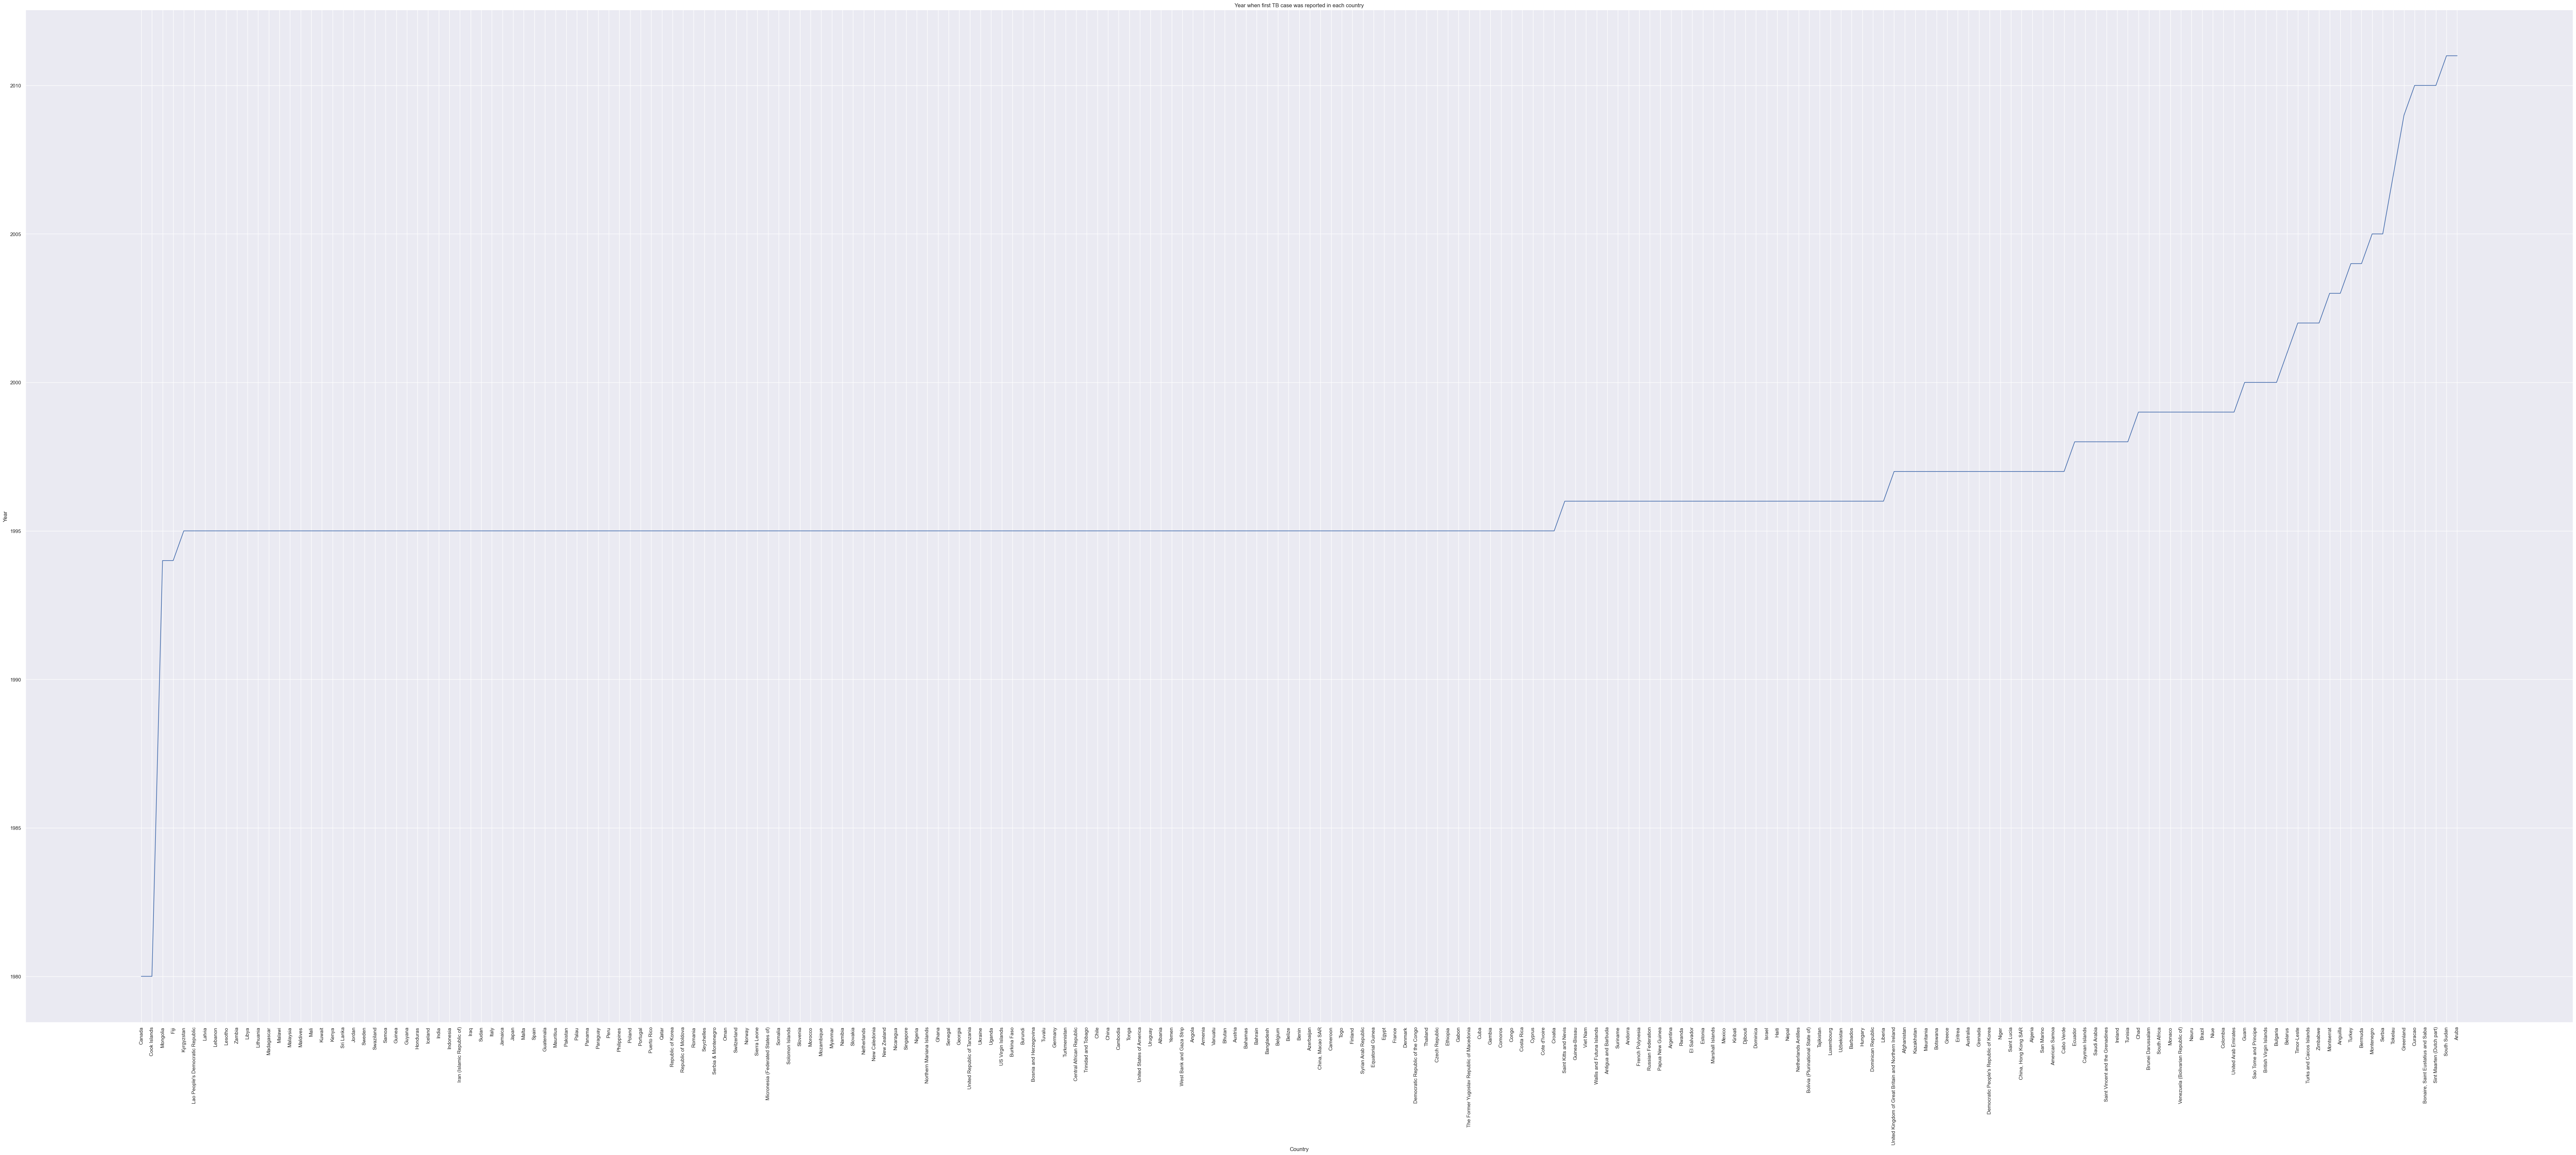

In [22]:
sns.set(rc={'figure.figsize':(100, 40)})
plt.ylabel("Year")
plt.xlabel("Country")
plt.xticks(rotation = 90)
sns.lineplot(data=df_tb).set(title='Year when first TB case was reported in each country')
plt.plot()